# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [226]:
# Librerias a instalar

# install.packages("cluster")
# install.packages("mclust")

In [227]:
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 9 components: 

 log-likelihood  n  df       BIC       ICL
       69.49069 25 148 -337.4122 -337.4122

Clustering table:
1 2 3 4 5 6 7 8 9 
3 3 6 3 2 1 1 4 2 

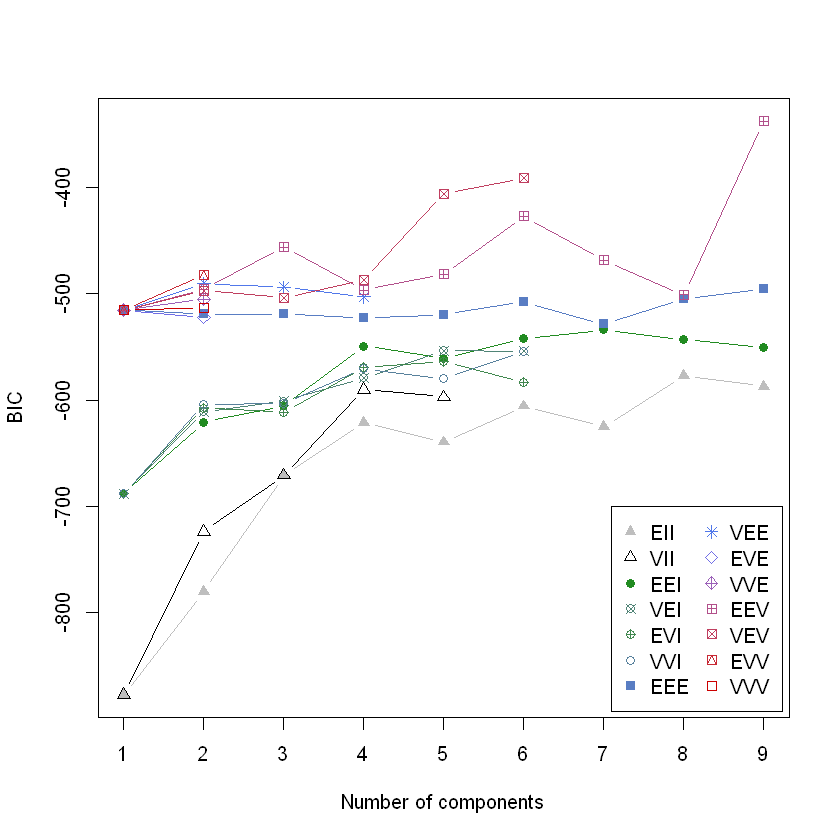

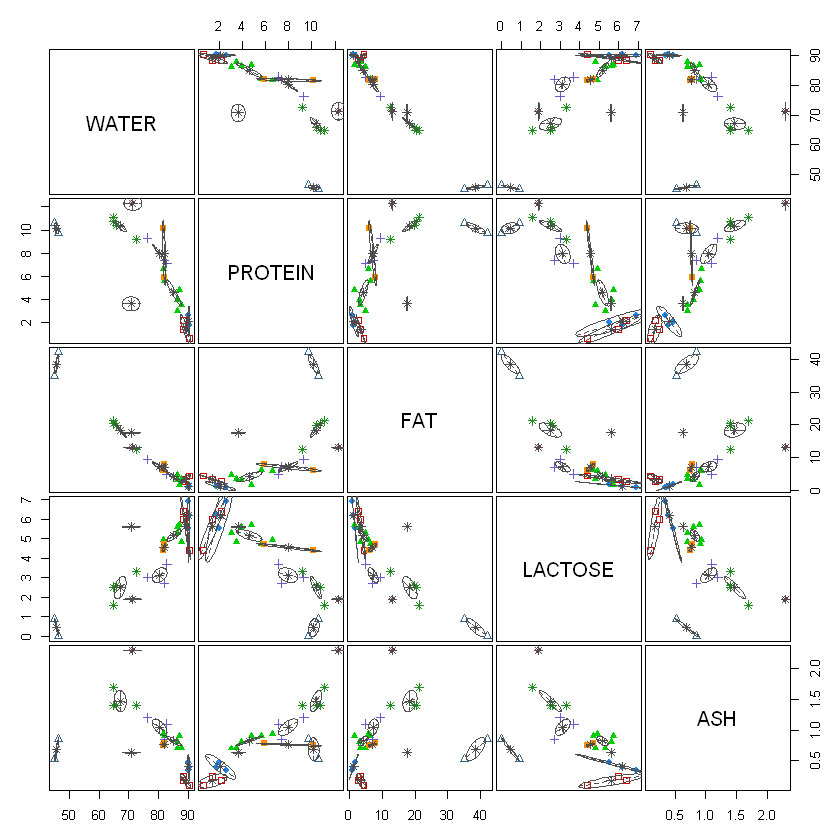

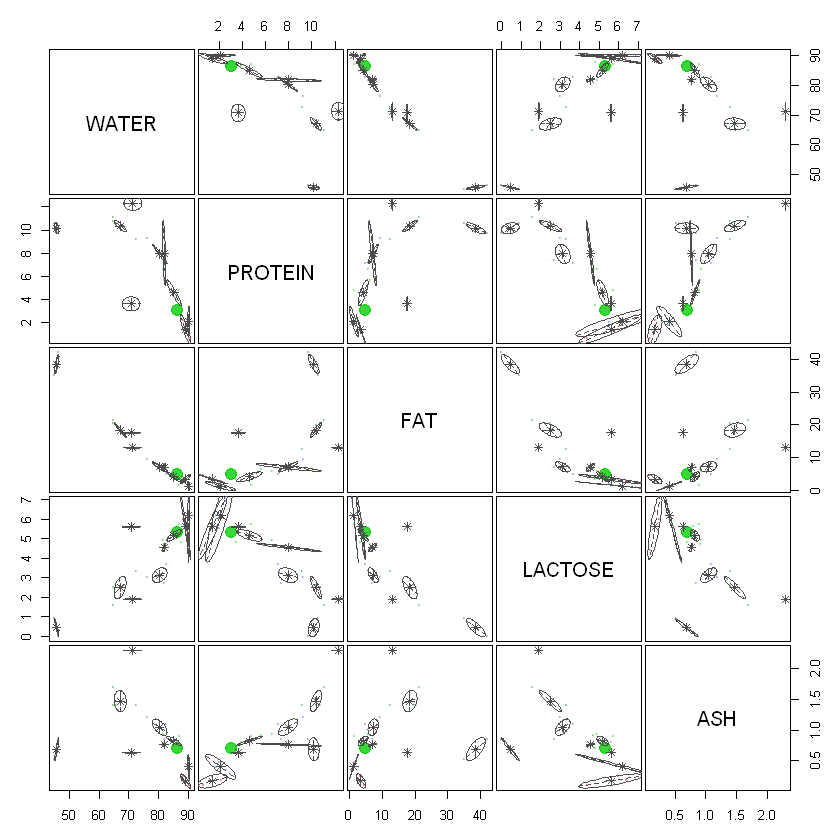

'Mclust' model object: (EEV,9) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

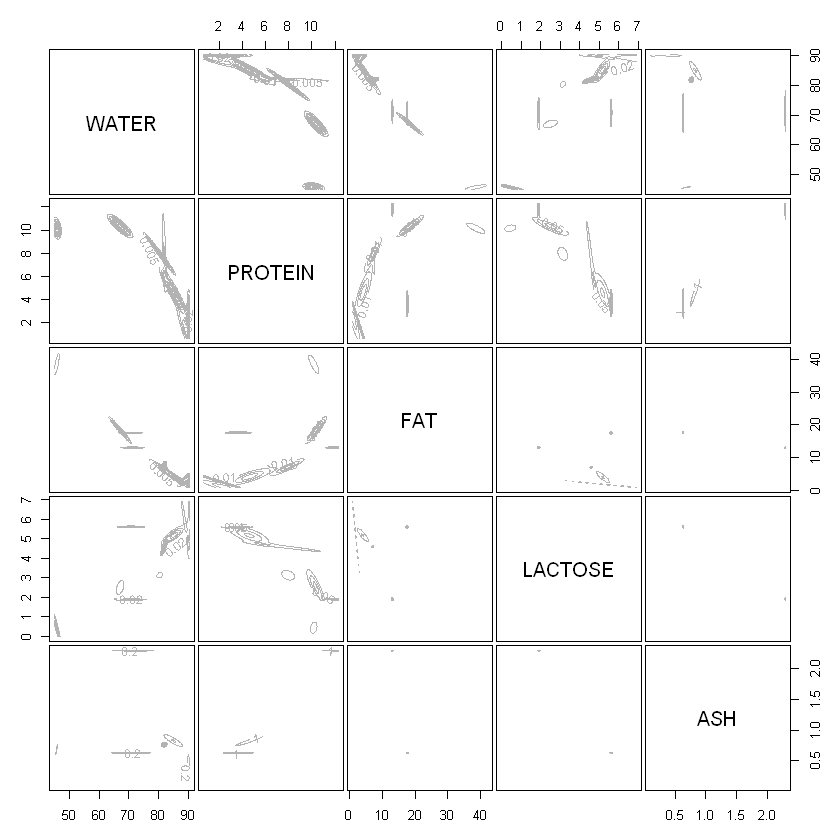

In [228]:
clus <-Mclust(datos)
summary(clus)
plot(clus)
clus




In [229]:
cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl


WATER,PROTEIN,FAT,LACTOSE,ASH
90.13333,2.100000,1.400000,6.200000,0.4066667
89.10000,1.400000,3.566667,5.600000,0.1733333
85.15000,4.566667,4.233333,5.166667,0.8250000
80.33333,7.933333,7.266667,3.133333,1.0500000
81.85000,8.000000,7.100000,4.550000,0.7650000
70.70000,3.600000,17.600000,5.600000,0.6300000
71.30000,12.300000,13.100000,1.900000,2.3000000
67.00000,10.350000,18.450000,2.500000,1.4750000
45.65000,10.150000,38.450000,0.450000,0.6900000


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          2          2          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         5          4          5          3          3          1          4 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          4          6          7          8          8 
  REINDEER      WHALE       SEAL    DOLPHIN 
         8          8          9          9

**Ejercicio 1:**

a) Explique como funciona el método Mclust, describa los principales parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

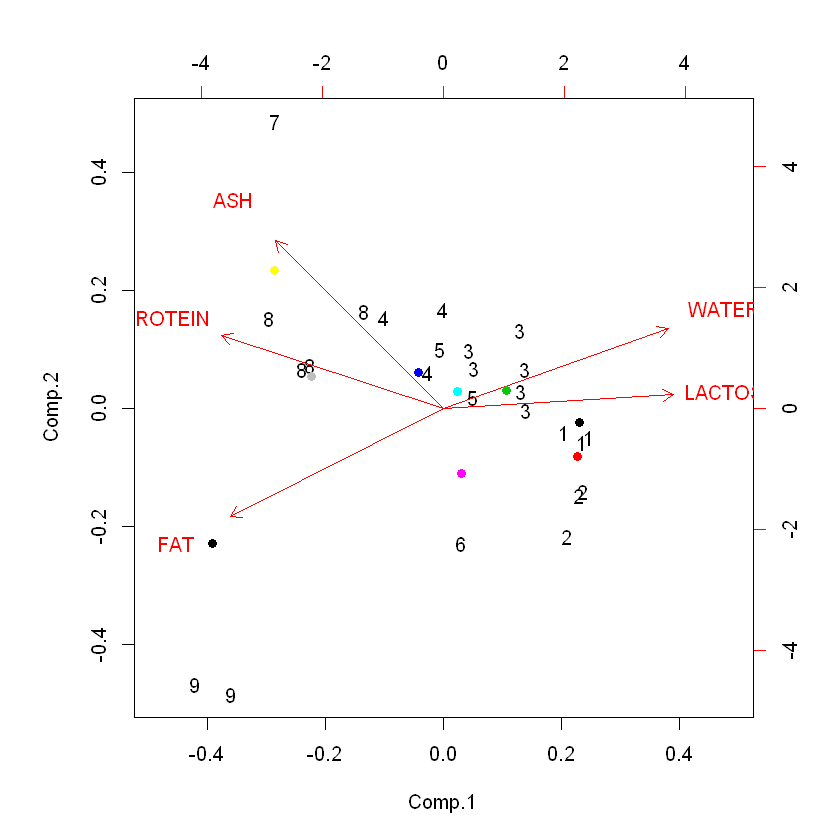

In [230]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


**Criterio de Información Bayesiano**

Una forma de discriminar entre posibles agrupamientos, es calcular el Criterio de Información Bayesiano, cuya expresión genérica es:
$$BIC = log L(Datos\mid \hat{\theta}) - \frac{d}{2}log(N)$$
donde $d$ es el número de parámetros libres y $N$ el número de observaciones. A medida que aumenta el número de parámetros la verosimilitud aumenta, pero esto es moderado por el término en que depende de $d$.

Mclust calcula automática el BIC para distintas configuraciones de las matrices covarianza de cada Normal multivariada (que corresponden a distintos números de parámetros) así como distinto número de grupos. Por parsimonia, es recomendable escoger el primer número de grupos que representa un máximo local.

**Ejercicio 2:**

a) Utilice Mclust sin definir el número de grupos y considere el Criterio de información Bayesiano (BIC) para decidir el número de grupos óptimo. 

b) Discuta y compare  sus resultados con aquellos obtenidos con k-means

En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico

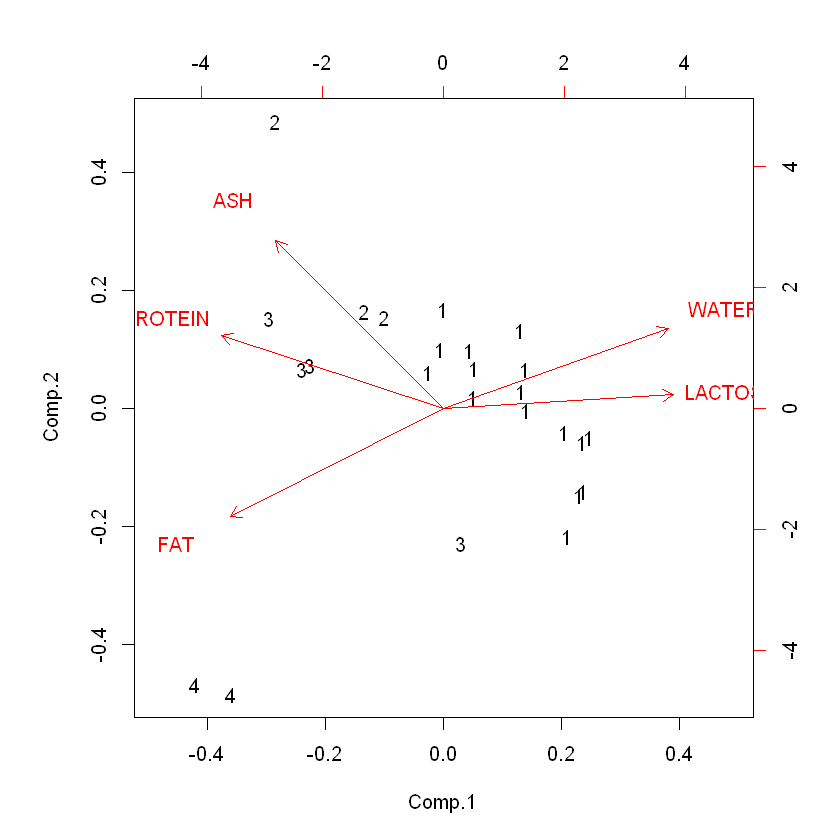

In [231]:
res3 <- hclust(dist(datos))
biplot(res, xlabs= cutree(res3,4))

**Ejercicio 3:** 

a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

c) Utilice otros parámetros en hclust y discuta como varían los resultados. 

**Ejercicio 4:** (3 puntos)

a) Considere los datos comunas.csv y escoja las comunas de una sola región para realizar sus análisis. Realice un análisis de clustering con K-means, GMM y Análisis Jerárquico para dichos datos, excluyendo el índice IDSE. Interprete sus resultados.

b) Estudie las medidas de calidad propuestas en Murphy, Capítulo 25: purity, rand index y mutual information (pdf en siveducMD). Calcule alguna de las medidas de calidad estudiadas, para cada uno de los análisis realizado en (a), considerando  una categorización (IDSE_bis) de los datos según el índice IDSE, de la manera siguiente:
1. IDSE_bis = 1 si 0 <= IDSE < 0.3
2. IDSE_bis = 2 si 0.3 <= IDSE < 0.4
3. IDSE_bis = 3 si 0.4 <= IDSE < 0.5
4. IDSE_bis = 4 si 0.5 <= IDSE < 0.6
5. IDSE_bis = 5 si 0.6 <= IDSE < 0.7
6. IDSE_bis = 6 si 0.7 <= IDSE < 0.8
7. IDSE_bis = 7 si 0.8 <= IDSE < 0.9
8. IDSE_bis = 8 si 0.9 <= IDSE < 1


Discuta sus resultados.

In [232]:
#       4.0 Preparando datos

# Datos iniciales con nombres de ciudad en fila
datos <- read.csv("comunas.csv", row.names = 2 ,header=TRUE,sep=";",dec=".")
dim(datos)
head(datos)

[1] 323  13

,Region,Poblaciï..n..miles..2011,IDSE,Ingreso.per.cï..p..Mens..miles....2006.11,Pobreza...2006.11,Escolaridad..aï..os..2006.11,Material.Vivienda.bueno.o.acceptable...2006,Alcantarillado.o.Fosa.S.pt....2006,Esperanza.vida.al.nacer..aï..os..2005.10,X.ndice.Desarrollo.Humano,Tasa.AVPP.x.1000.h.2007.11,X..defunc..50..aï..os.2011,Mortalidad.Infantil.x.1000.NV.2009.11
Iquique,1,186.0,0.698,227.6,10.2,11.1,81.8,98.8,77.2,0.631,82.1,73.0,8.9
Pica,1,18.6,0.604,188.1,12.2,9.6,71.0,94.0,77.5,0.572,23.0,45.8,9.8
Pozo Almonte,1,17.3,0.591,176.0,9.8,9.7,73.1,83.5,77.3,0.574,44.3,66.7,7.1
Alto Hospicio,1,93.8,0.577,166.3,20.9,10.1,65.9,98.4,78.1,0.555,46.7,56.2,4.9
Huara,1,3.4,0.382,161.4,10.0,7.6,49.0,38.9,81.8,0.592,55.8,44.4,8.9
Calama,2,148.8,0.717,269.3,8.5,10.9,85.0,98.9,76.2,0.625,87.2,63.4,9.7


In [233]:
# Quitando IDSE
# Y seleccionando REGIÓN Metropolitana XIII

datos <- datos[datos$Region=='13',c(1,2,4,5,6,7,8,9,10,11,12,13)]

In [234]:
# Eliminando columna de Region
datos <- datos[,c(2,3,4,5,6,7,8,9,10,11,12)]

,Poblaciï..n..miles..2011,Ingreso.per.cï..p..Mens..miles....2006.11,Pobreza...2006.11,Escolaridad..aï..os..2006.11,Material.Vivienda.bueno.o.acceptable...2006,Alcantarillado.o.Fosa.S.pt....2006,Esperanza.vida.al.nacer..aï..os..2005.10,X.ndice.Desarrollo.Humano,Tasa.AVPP.x.1000.h.2007.11,X..defunc..50..aï..os.2011,Mortalidad.Infantil.x.1000.NV.2009.11
Vitacura,79.6,1143.1,2.0,15.0,98.0,100.0,82.0,0.991,45.6,88.6,6.6
Las Condes,288.1,953.0,1.7,14.7,97.9,99.6,82.2,0.972,39.6,87.4,5.1
Providencia,126.6,966.7,1.3,14.6,95.8,100.0,80.0,0.931,57.7,89.7,8.0
Nunoa,145.1,569.3,4.1,13.7,95.7,100.0,79.4,0.841,64.4,88.5,6.7
Santiago,164.0,487.5,6.9,13.1,87.1,98.5,76.0,0.733,108.3,79.0,6.3
La Reina,95.5,530.5,5.8,12.6,86.5,100.0,80.0,0.808,53.2,86.3,5.0


 Poblaciï..n..miles..2011 Ingreso.per.cï..p..Mens..miles....2006.11
 Min.   :  4.60           Min.   : 135.8                           
 1st Qu.: 65.25           1st Qu.: 163.1                           
 Median : 92.20           Median : 185.9                           
 Mean   :127.84           Mean   : 264.2                           
 3rd Qu.:131.57           3rd Qu.: 239.6                           
 Max.   :735.40           Max.   :1143.1                           
 Pobreza...2006.11 Escolaridad..aï..os..2006.11
 Min.   : 1.300    Min.   : 7.80               
 1st Qu.: 8.975    1st Qu.: 9.70               
 Median :10.900    Median :10.20               
 Mean   :11.063    Mean   :10.54               
 3rd Qu.:13.100    3rd Qu.:11.00               
 Max.   :20.100    Max.   :15.00               
 Material.Vivienda.bueno.o.acceptable...2006 Alcantarillado.o.Fosa.S.pt....2006
 Min.   :74.60                               Min.   : 54.30                    
 1st Qu.:82.33              

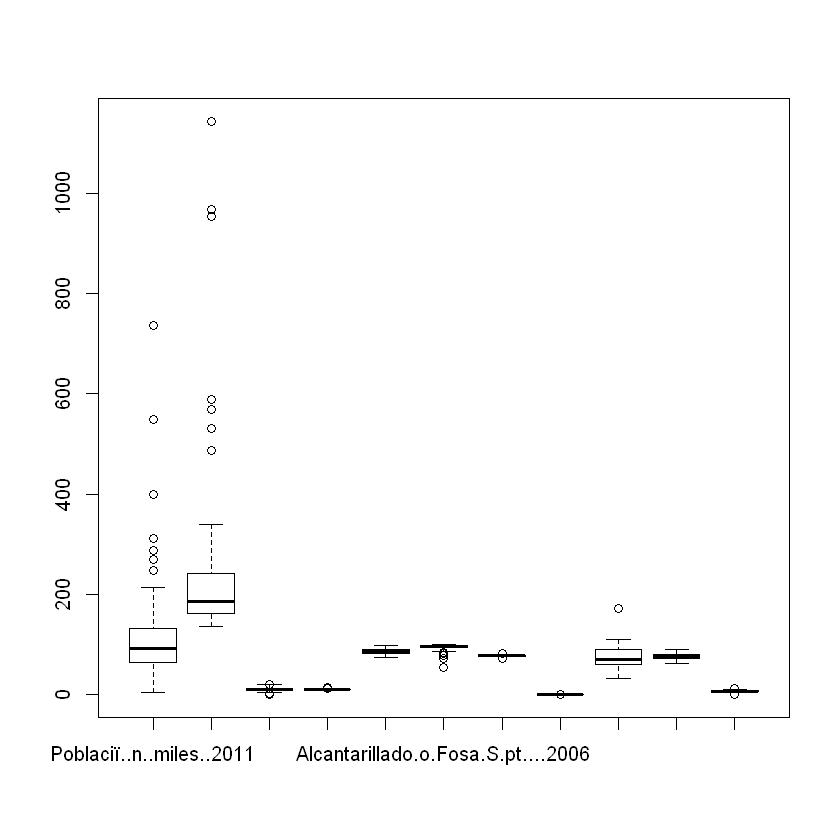

In [235]:
head(datos)
summary(datos)
boxplot(datos)

[1] 52 11

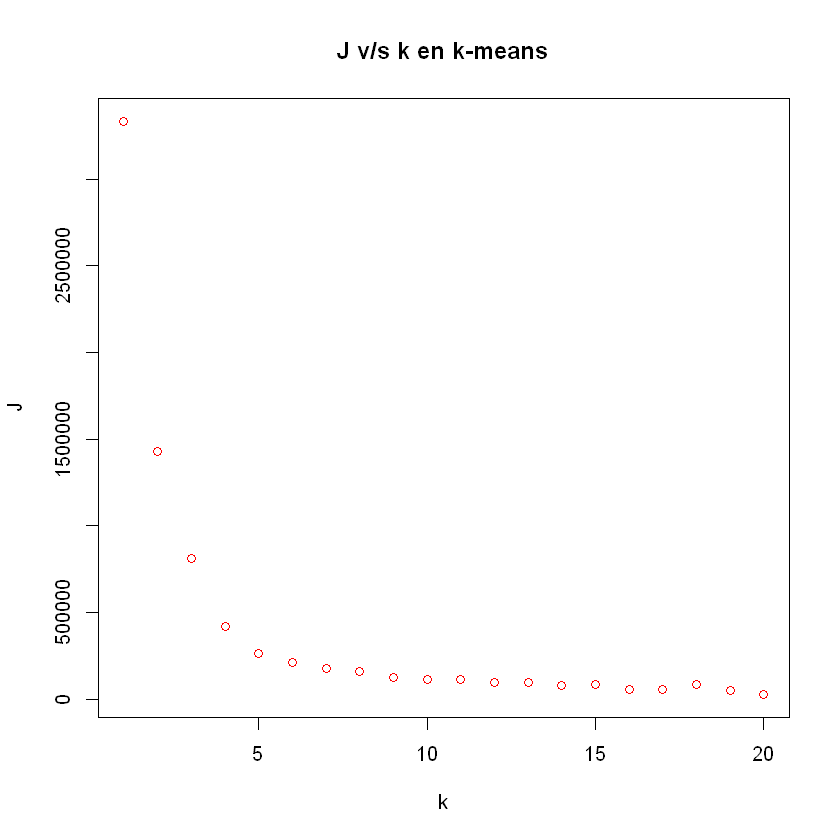

In [236]:
dim(datos) # 52 Comunas de RM

J <- rep(0,20)
fin_iter <- 20
for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	J[k]<-cl$tot.withinss
}

#Grafica
plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 


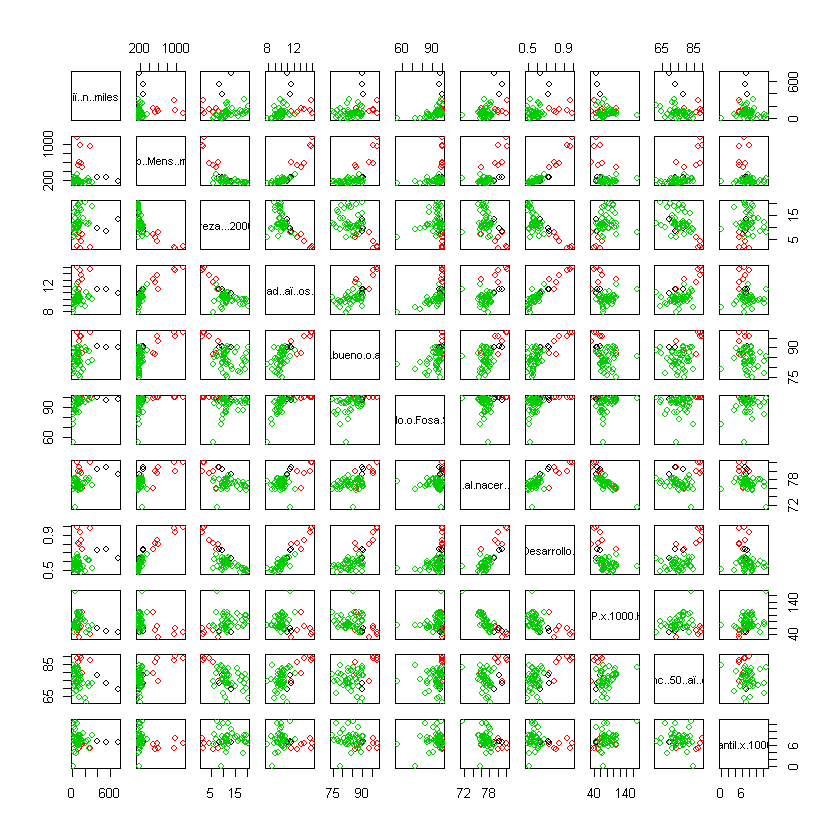

In [237]:
#       4.1 K-Means

# K = 3
k0 = 3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
pairs(datos,col=cl$cluster)
#Para saber qué ciudad corresponde a cada grupo: cl$cluster
# cl$cluster

#GRUPOS POR TAMAÑO
#1
# La Florida Maipu Puente Alto
#2
# Vitacura Las Condes Providencia Nunoa Santiago La Reina Lo Barnechea
#3 Todas las comunas restantes

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6     Comp.7 
2.29022616 1.35342958 1.24115246 0.92264295 0.70951302 0.64222583 0.54195632 
    Comp.8     Comp.9    Comp.10    Comp.11 
0.45614636 0.26407418 0.20566292 0.04100978 

 11  variables and  52 observations.


Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11
1.9290994,2.42371040,1.81892572,-0.031731090,1.66183678,-0.02478095,0.464726821,-0.19287551,-0.126220182,-0.07399226,0.01429747
4.7694784,-0.54611986,-0.39024008,0.055284025,-0.15934528,0.13252388,-0.186156279,0.28347949,0.021656798,0.02132137,0.01638763
-0.9327059,-0.08210219,-0.06488325,-0.006947498,-0.09214508,-0.02031725,-0.002168726,-0.03346976,0.005406261,0.00173160,-0.00375252


K-means clustering with 3 clusters of sizes 3, 7, 42

Cluster means:
  Poblaciï..n..miles..2011 Ingreso.per.cï..p..Mens..miles....2006.11
1                 560.8667                                  232.3667
2                 144.0714                                  748.2857
3                  94.2000                                  185.8238
  Pobreza...2006.11 Escolaridad..aï..os..2006.11
1         10.233333                     11.33333
2          4.214286                     13.61429
3         12.264286                      9.97619
  Material.Vivienda.bueno.o.acceptable...2006
1                                    90.26667
2                                    93.50000
3                                    84.14524
  Alcantarillado.o.Fosa.S.pt....2006 Esperanza.vida.al.nacer..aï..os..2005.10
1                           98.10000                                 80.20000
2                           99.68571                                 80.07143
3                           92.41667     

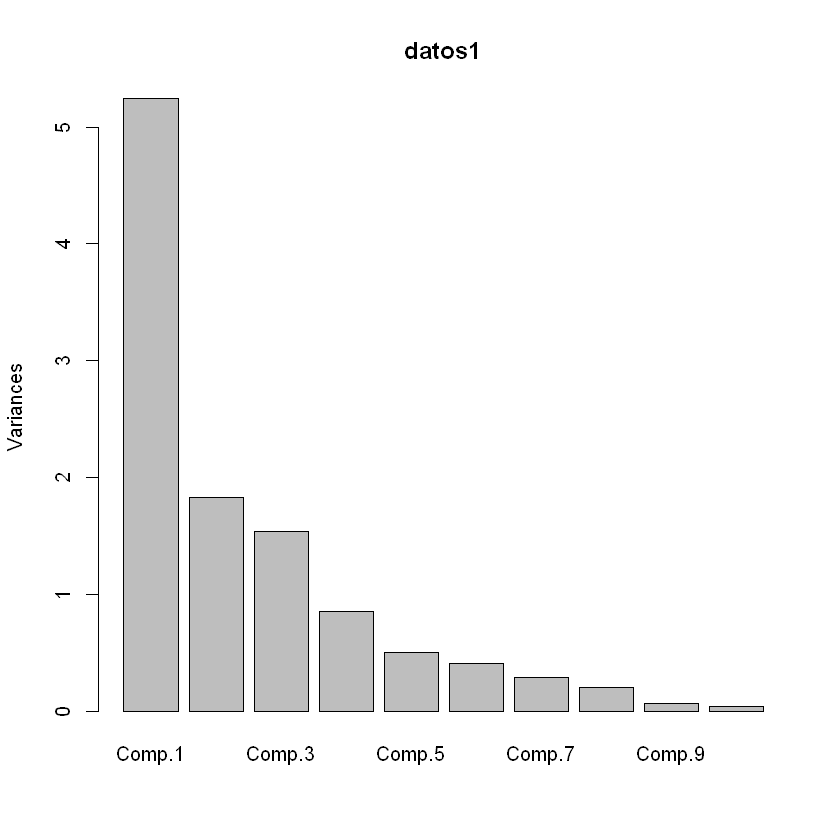

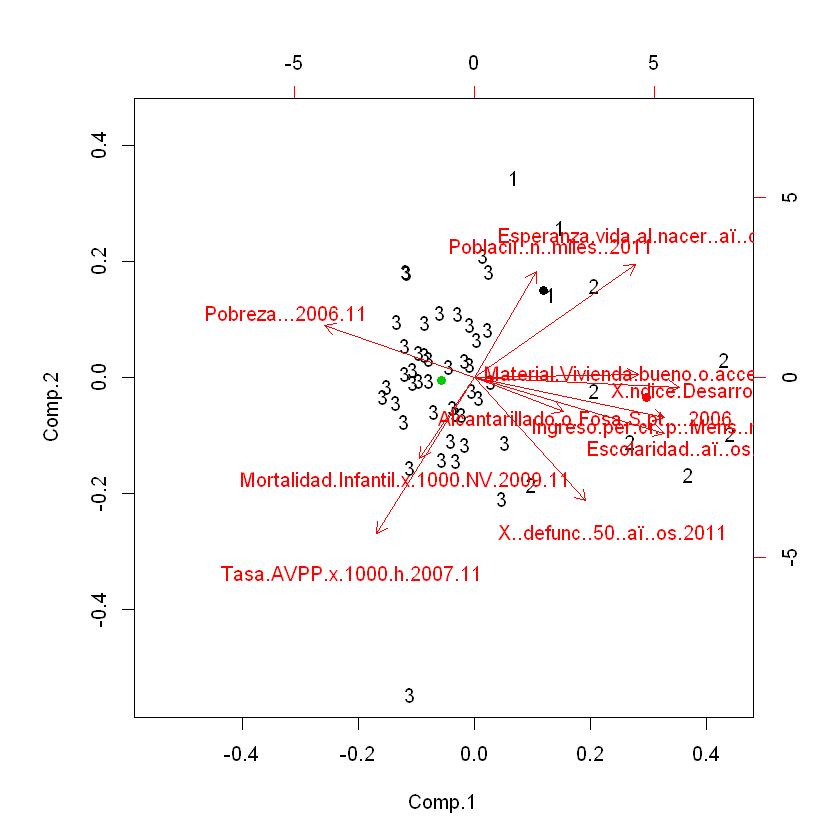

In [238]:
#KMEANS
datos1 <- princomp(datos, cor=TRUE)
print(datos1)
plot(datos1) #barras
datos2 <- predict(datos1,cl$centers)
datos2
cl
biplot(datos1,xlabs=cl$cluster) #flechas
points(datos2[,1:11],col=1:k0,pch=19)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 3 components: 

 log-likelihood  n  df       BIC       ICL
       -1230.49 52 213 -3302.595 -3302.604

Clustering table:
 1  2  3 
15  9 28 

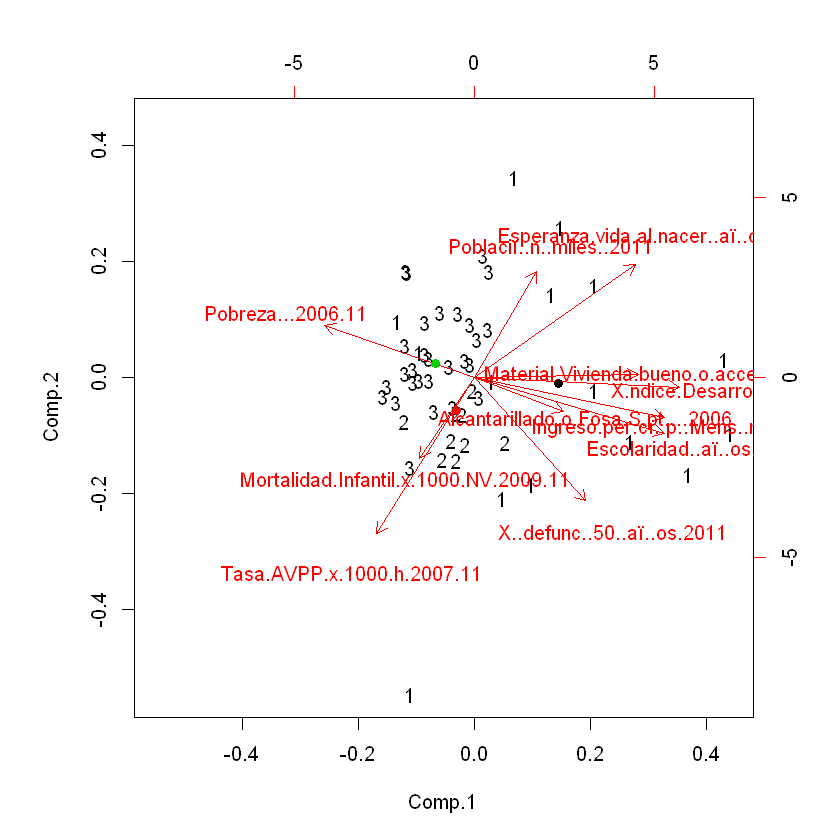

In [239]:
clus = Mclust(datos,G=3)
summary(clus)
cl <- clus$classification
centers <- t(clus$parameters$mean)
#GMM
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
points(res2[,1:11],col=1:k0,pch=19)

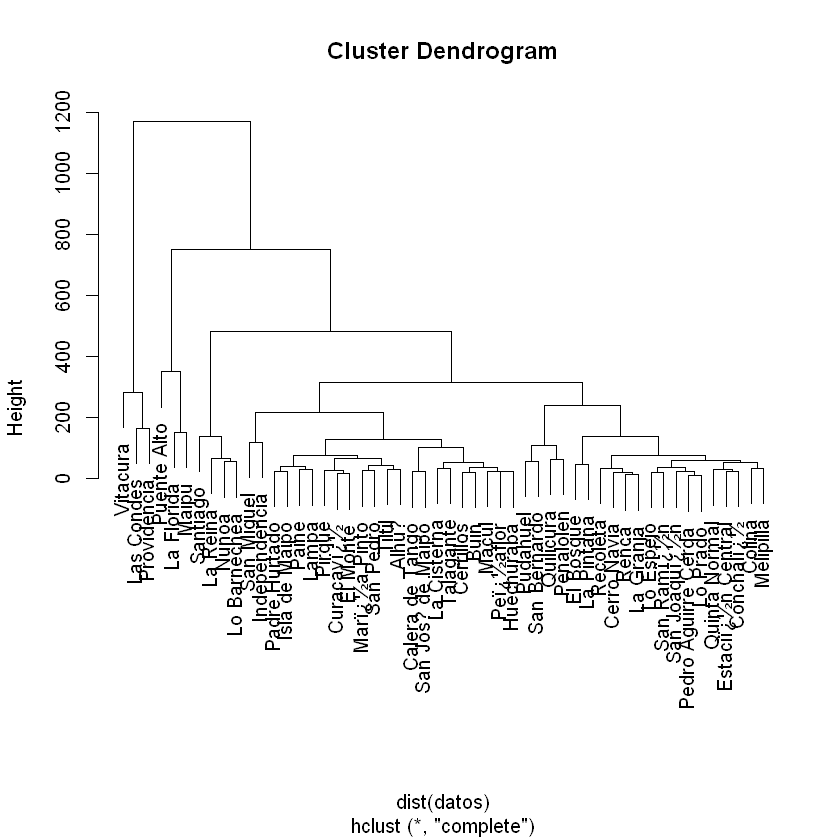

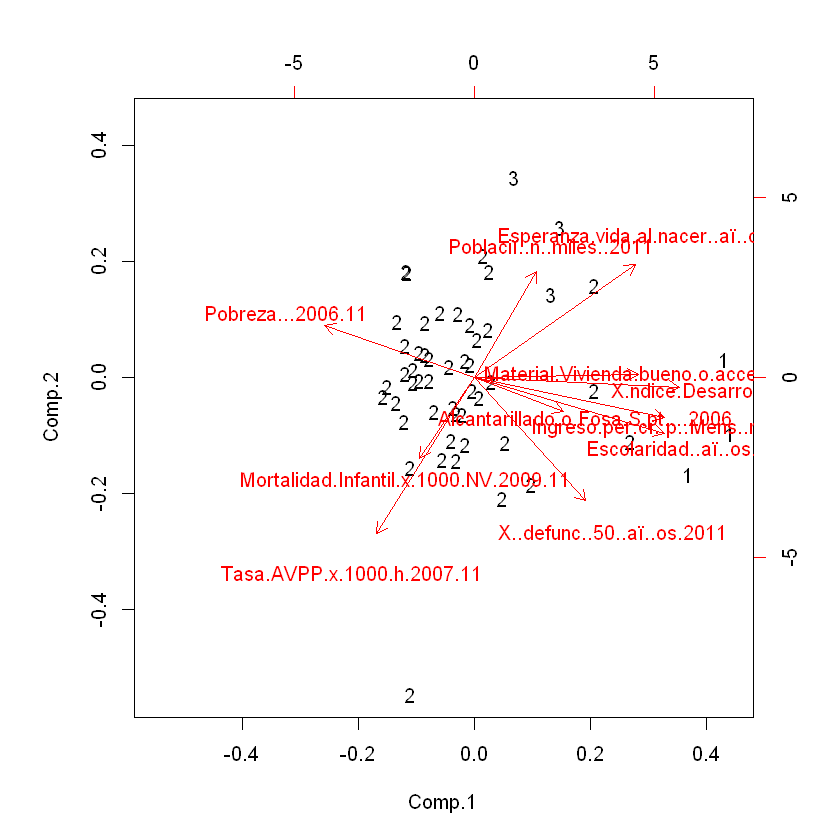

In [240]:
# Agrupamiento Jerarquico
res3 <- hclust(dist(datos))
plot(res3)
biplot(res, xlabs= cutree(res3,3))

In [241]:
# Se escogió K = 3 Y por ende G = 3

# El GMM tiene problemas con los números centrales, llegando a verse hasta los 3 grupos mezclados sin distinción en el centro de componentes
# Se podría decir que hizo la peor agrupación de los 3

# En el caso del Jerarquico tiene dificultades para el grupo de arriba cercano a Población miles (3 y 2)

# El agrupamiento de K-means para este caso, presenta problemas similares al Jerarquico, siendo el K-means un poco visualmente mejor que el Jerarquico